In [ ]:
#import plotly
#plotly.tools.set_credentials_file(username='shivamsawhney17', api_key='kPqGwf5J96LBtQpSEOe2')

#import plotly
#plotly.tools.set_credentials_file(username='guptaaish2012', api_key='1ZKXnLngPeFpGFF4w4t8')

#plotly.tools.set_credentials_file(username='sharmishtha', api_key='VavtVZPWfpt8VDSbhQBZ')

#plotly.tools.set_credentials_file(username='guptaaish2015', api_key='APXxo52BsVuxwsKpaHLM')

# Odisha Statistical Analysis of Socio-Economic parameters

## Directions of using this notebook
* Make sure that you have plotly and Pandas installed in the system
* The graphs are interactive. Clicking on a legend makes the said graph disappear.
* Hovering the mouse pointer over the graph displays the corresponding x and y values at the point.
* There are some graphs (eg. Rural households by main source of drinking water within the premises) which have 2 y axes for effective visualization of the minority information.
* The toggle on and of button below and at the end control the display of the code.

In [57]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [56]:
import plotly
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from IPython.display import Image

## Map of Odisha

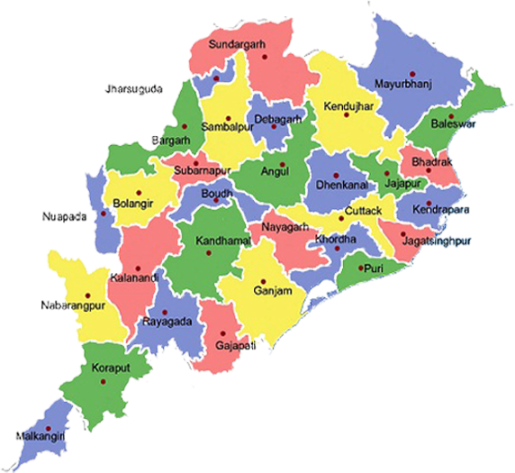

In [2]:
Image("odisha_map.png")

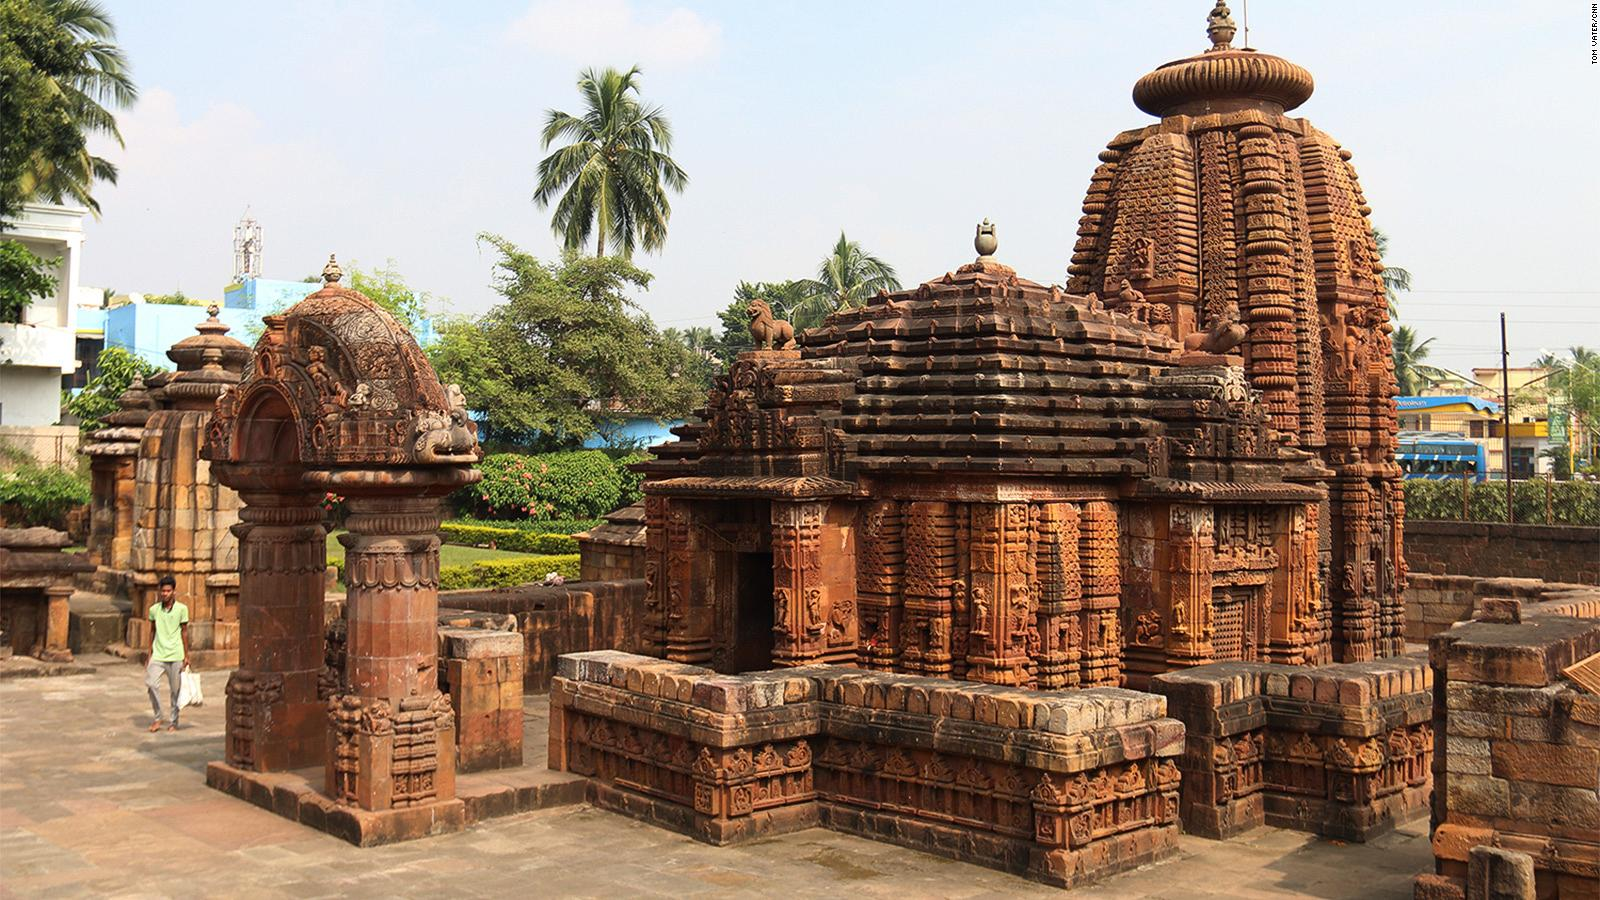

In [3]:
Image('odisha.jpg')

In [4]:
attr = []
limit = []
district = []
value = []

In [5]:
plotly.tools.set_credentials_file(username='guptaaish2015', api_key='APXxo52BsVuxwsKpaHLM')

In [55]:
df8 = pd.read_csv('odishaecon.csv')
df8_new = df8[
    [
        'DISTRICT 2010-2011',
        'GDDP',
        '%GDDP',
        'Funds Available (Rs. Crore)',
        'Total Expenditure (Rs. Crore)',
        'Physical_Functioning SHGs(No.)'
    ]
]
df8_fund = df8.iloc[:,13:15]
df8_fund.columns = ['NRLM Funds available(Rs. lakh)','NRLM Financial Total Expenditure(Rs. lakh)']
df8 = pd.concat([df8_new, df8_fund], axis=1, sort=False)
df8 = df8.rename(columns = {'DISTRICT 2010-2011':'Districts'})

## Gross District Domestic Product
The following graph shows the distribution of gross domestic dictrict product accross the districs of Odisha.The Debagarh district has the least amount of GDDP while the Sundargarh district has the highest. There is a huge variation between the two districts and the rest that fall on the graph. While the blue bars indicate the actual amount of GDDP, the orange lines indicate the percentage contribution of the same in total GDP of Odhisha.

In [7]:
df8 = df8.sort_values(by = ['GDDP'])
#stat3 = stat2.sort_values(by = ['% Area Forest Cover'])
data = [
    go.Bar(
        x=df8['Districts'], # assign x as the dataframe column 'x'
        y=df8['GDDP'],
        name = 'GDDP',
        textposition ='outside',
        text = (df8['GDDP']/1000000).apply(lambda x: str(np.round(x,2)) + 'M'),
        textfont = {'size': 15,'color':'white'}
        
    ),
    go.Scatter(
        x=df8['Districts'], # assign x as the dataframe column 'x'
        y=df8['%GDDP'],
        name = '%GDDP',
        textposition ='top center',
        mode = 'text+lines+markers',
        text = df8['%GDDP'],
        textfont = {'size': 8,'color':'white'},
        yaxis = 'y2',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    barmode='overlay',
    title='GDDP of Districts of Odisha',
    yaxis=dict(
        title='GDDP'
    ),
    yaxis2=dict(
        title='%GDDP',
        titlefont=dict(
            color='slategrey'
        ),
        tickfont=dict(
            color='slategrey'
        ),
        overlaying='y',
        side='right',
        range = [0.3,15]
    ),
    plot_bgcolor='silver'
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='GDDP of Districts of Odisha')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~guptaaish2015/0 or inside your plot.ly account where it is named 'GDDP of Districts of Odisha'


## MGNREGA funds availabe and total expenditure district wise
The graph below shows the MGNREGA funds distribution district wise along with the total district wise expenditure. The graph draws a clear contrast betweeen the two factors. The blue bars display the funds in crore while the orange lines touch the expenditure points of the districts. From the graph it can be seen that the districts of Debagarh, Bhadrak, Nagarangapur, Rayagada, Balangir and Ganjam are the only once to have exceeded the total provided funds. Rest of the districts generated a positive balance of funds in the accounting year.

In [8]:
df8 = df8.sort_values(by=['Funds Available (Rs. Crore)'])
data = [
    go.Bar(
        x=df8['Districts'], # assign x as the dataframe column 'x'
        y=df8['Funds Available (Rs. Crore)'],
        name = 'MGNREGA Funds Available (Rs. Crore)',
        textposition ='outside',
        text=df8['Funds Available (Rs. Crore)']
    ),
    go.Scatter(
        x=df8['Districts'],
        y=df8['Total Expenditure (Rs. Crore)'],
        name = 'MGNREGA Total Expenditure (Rs. Crore)',
        textposition ='bottom center',
        text=df8['Total Expenditure (Rs. Crore)'],
        textfont = {'color': 'white','size':8},
        mode = 'text+markers+lines'
        
    )

]

layout = go.Layout(
    #barmode='overlay',
    title='MGNREGA Funds available and Total expenditure for Districts of Odisha',
    yaxis = dict(range = [0,250],title = 'MGNREGA Funds available and Total expenditure' ),
    legend=dict(orientation="h", x = .51, y = 1.1),
    plot_bgcolor='silver'
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='MGNREGA Funds available and Total expenditure')

## District-wise population in Odisha
The following graph showcases the population distribution in all the districts of Odisha. Here, the highest population holder is Ganjam while the lowest on the axis is Deogarh. The graph with population density, however, indicates that even though Khurda is the fifth most populated district, it has the highest population density i.e. it is the district with maximum people to area ratio. Jagatsinghpur falls next on the highest population density list and so on.
Another interesting finding from the graph of population increase is that even though Jagatsinghpur is second on population density index, it is the district with minimum population increase while Blanagir has experienced maximum population increase in the accounting year.

In [9]:
stat1 = pd.read_csv('odisha stats.csv').drop([30],axis=0)

In [10]:
for i in stat1:
    
    #if condition so that it does not sort districts itself
    if i != 'Districts':
        
        #for each column the max value is calculated
        #District and the corresponding value is converted to dictionary
        dic1 = stat1[stat1[i] == stat1[i].max(skipna=True)][['Districts',i]].to_dict()
        
        #data is split into attributes, limits, district and value
        for i in dic1:
            dic1[i] = list(dic1[i].values())[0]
            
        district.append(dic1['Districts'])
        limit.append('max')
        attr.append(list(dic1.items())[1][0])
        value.append(list(dic1.items())[1][1])
        
        
        #for each column the max value is calculated
        #District and the corresponding value is converted to dictionary
        dic2 = stat1[stat1[i] == stat1[i].min(skipna=True)][['Districts',i]].to_dict()
        
        #data is split into attributes, limits, district and value
        for i in dic2:
            dic2[i] = list(dic2[i].values())[0]
        
        district.append(dic2['Districts'])
        limit.append('min')
        attr.append(list(dic2.items())[1][0])
        value.append(list(dic2.items())[1][1])

In [11]:
stat1 = stat1.sort_values(by=['Population'])

data = [
    go.Bar(
        x=stat1['Districts'], # assign x as the dataframe column 'x'
        y=stat1['Population'],
        name = 'Population',
        #showlegend = True,
        textposition ='inside',
        text=stat1['Population'],
        textfont = {'size': 10, 'color': 'white'}
    )
]

layout = go.Layout(
    barmode='overlay',
    title= 'Population' + ' of Districts of Odisha',
    yaxis=dict(
        title='Number of People'
    )
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Population')

In [12]:
stat1 = stat1.sort_values(by=['Population Density'])

data = [
    go.Bar(
        x=stat1['Districts'], # assign x as the dataframe column 'x'
        y=stat1['Population Density'],
        name = 'Population Density',
        #showlegend = True,
        textposition ='outside',
        text=stat1['Population Density'],
        textfont = {'size': 10, 'color': 'black'},
        marker = {'color':'darkslategrey'}
    )
]

layout = go.Layout(
    barmode='overlay',
    title= 'Population Density' + ' of Districts of Odisha'
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Population Density')

In [13]:
stat1 = stat1.sort_values(by=['Population increase'])

data = [
    go.Bar(
        x=stat1['Districts'], # assign x as the dataframe column 'x'
        y=stat1['Population increase'],
        name = 'Total Area',
        #showlegend = True,
        textposition ='auto',
        text=stat1['Population increase'],
        textfont = {'size': 20, 'color': 'white'},
        marker = {'autocolorscale':True,'colorscale':'Jet','color':'dimgrey'},
        width = [0.05]*30,showlegend = False
    ),
    go.Scatter(
        x=stat1['Districts'], # assign x as the dataframe column 'x'
        y=stat1['Population increase'],
        name = 'Total Area',
        mode = 'markers+text',
        textposition ='top center',
        text=stat1['Population increase'],
        textfont = {'size': 8, 'color': 'black'},
        showlegend = False,
        marker = {'size' : 20},
        hoverinfo = 'skip'
    )
]

layout = go.Layout(
    barmode='overlay',
    title= 'Population increase' + ' of Districts of Odisha',
    yaxis=dict(
        title='% Increase in population'
    ),
    legend=dict(orientation="h", x = .51, y = 1.1)
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Population increase')

## Literacy rate in districts of Odisha
The following graph displays the literacy rates in all the districts in Odisha in increasing order. Nawarangpur falls least on the graph while Khurda goes the highest. The graph also highlights the districts with 80% and above rate with black spheres in top. This directly implies that all the districts from Jajpur to Khurda fall on the spectrum of high literacy rates. 
The next two graphs display information about the RURAL and URBAN literacy index of Odisha respectively. They have drawn bifurcation on the basis of illeterate population and the literate population but below Metric level. The blue lines represent the rural and urban illeterate population of Odisha while the orange lines represent the rural and urban literates uptil metric level. 


In [14]:
stat1 = stat1.sort_values(by=['Literacy'])

data = [
    go.Bar(
        x=stat1['Districts'], # assign x as the dataframe column 'x'
        y=stat1['Literacy'],
        name = 'Total Area',
        #showlegend = True,
        textposition ='auto',
        text=stat1['Literacy'],
        textfont = {'size': 20, 'color': 'white'},
        marker = {'autocolorscale':True,'colorscale':'Jet','color':'dimgrey'},
        width = [0.03]*30,showlegend = False
    ),
    go.Scatter(
        x=stat1['Districts'], # assign x as the dataframe column 'x'
        y=stat1['Literacy'],
        name = 'Total Area',
        mode = 'markers+text',
        textposition ='top center',
        text=stat1['Literacy'],
        textfont = {'size': 8, 'color': 'black'},
        showlegend = False,
        marker = {'color': np.where(stat1['Literacy'] < 80, 'crimson', 'slategrey'), 'size' : 15, 'line' : { 'color' : 'black','width' : 2}},
        hoverinfo = 'skip'
    )
]

layout = go.Layout(
    barmode='overlay',
    title= 'Literacy Rate' + ' of Districts of Odisha',
    yaxis=dict(
        title='Literacy Rate'
    )
    #paper_bgcolor='silver',
    #plot_bgcolor='lavender'
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Literacy Rate')

In [15]:
df10 = pd.read_excel('untitled folder/DDW-2100C-11.xlsx',header = 5).reset_index()
df10 = df10[(df10['level_3'].str.match('District.*',na = False))&(df10[1]=='All ages') & (df10['level_4'] != 'Total')]#.drop([1,2,3,4,5,8],axis =1)
df10['level_3'] = df10['level_3'].str.extract(r'District - (.*)')
df10['Literate but below Metric/Secondary'] = df10[14] + df10[17] + df10[20] + df10[23]
df10['Illiterate'] = df10[8]
df10 = df10.rename(columns = {'level_3':'Districts'})
df10 = df10[['Districts','level_4','Illiterate','Literate but below Metric/Secondary']]
df10_rural = df10[df10['level_4'] == 'Rural'].drop('level_4',axis = 1)
df10_urban = df10[df10['level_4'] == 'Urban'].drop('level_4',axis = 1)

In [16]:
data = [
    go.Scatter(
        x=df10_rural['Districts'], # assign x as the dataframe column 'x'
        y=df10_rural['Illiterate'],
        name = 'Illterate Population',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df10_rural['Districts'], # assign x as the dataframe column 'x'
        y=df10_rural['Literate but below Metric/Secondary'],
        name = 'Literate but below Metric/Secondary',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'Rural Literacy Index' + ' of Districts of Odisha',
    legend=dict(orientation="h", x = .5, y = 1.1),
    yaxis = dict(title = 'Rural Literacy Index'),
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Rural Literacy Index')

In [17]:
data = [
    go.Scatter(
        x=df10_urban['Districts'], # assign x as the dataframe column 'x'
        y=df10_urban['Illiterate'],
        name = 'Illterate Population',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df10_urban['Districts'], # assign x as the dataframe column 'x'
        y=df10_urban['Literate but below Metric/Secondary'],
        name = 'Literate but below Metric/Secondary',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'Urban Literacy Index' + ' of Districts of Odisha',
    legend=dict(orientation="h", x = .5, y = 1.1),
    yaxis = dict(title = 'Urban Literacy Index'),
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Urban Literacy Index')

In [18]:
df2 = pd.read_excel('untitled folder/DDW-HH1604-2100.xls',header = 6)

df2=df2[df2[6].str.match('District.*',na = False)]

df2[6] = df2[6].str.extract(r'District - (.*)')
df2 = df2[(df2[8] == 'Total') & (df2[9] != 'All Households')]

df2['1 or less Dwellings'] = df2[11] + df2[12]
df2['2-4 Dwellings'] = df2[13] + df2[14] + df2[15]
df2['5 or more Dwellings'] = df2[16] + df2[17]

df2=df2.drop([*range(1,6)] + [*range(10,18)],axis =1)

df_urban = df2[df2[7] == 'Urban'].drop([7,8],axis = 1)
df_rural = df2[df2[7] == 'Rural'].drop([7,8],axis = 1)

df_dist = df_urban[df_urban[9] == '1'].reset_index()[6]

## Rural and Urban dwelling wise distribution
The graphs shown below indicate the number of houses that have 1-2, 3-5 and 6 and above families living in them. Graphs at the beginning give information about hte Urban households. The first graph depicts that the Khordha district has the maximum number of houses with 1 or 2 families in it. The dwellings that are 5 or above in number with 1 to 2 families are nearly negligible in all the districts.
The next graph shows that households with 3 to 5 families mostly have 2 to 4 dwellings. The figures for 5 or more dwellings are gagain negligible while for 2 to 4 dwellings are significantly low in some distrcits and of mediocre amount in others.
The next graphs shows that even with 6 or more families in a household, most have 2 to 4 dwellings only. The figures for 5 or more dwellings are still low.

The subsequent three graphs show the same figures for Rural households. The patterns of observation for rural households are somwhat similar to the Urban ones with a change in districts on the axis. In rural areas too, in all the three cases i.e. households with 1-2 families, 3-5 families and 6 and more families, most of the households have 2 to 4 dwellings and the figures for 5 or more dwellings is pretty low. s 

In [19]:
df_urban_1 = df_urban[df_urban[9] == '1'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_urban_2 = df_urban[df_urban[9] == '2'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_urban_12 = df_urban_1.radd(df_urban_2,fill_value=0)
df_urban_12 = df_urban_12.drop('index',axis = 1)
df_urban_12['Districts'] = df_dist
df_urban_12 = df_urban_12.sort_values(by = ['1 or less Dwellings'])

data = [
    go.Scatter(
        x=df_urban_12['Districts'], # assign x as the dataframe column 'x'
        y=df_urban_12['1 or less Dwellings'],
        name = '1 or less Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df_urban_12['Districts'], # assign x as the dataframe column 'x'
        y=df_urban_12['2-4 Dwellings'],
        name = '2-4 Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df_urban_12['Districts'], # assign x as the dataframe column 'x'
        y=df_urban_12['5 or more Dwellings'],
        name = '5 or more Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'Urban Dwelling-wise distribution for 1-2 households' + ' of Districts of Odisha',
    yaxis=dict(
        title='Number of households'
    ),
    legend=dict(orientation="h", x = .51, y = 1.1)
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Urban Dwelling-wise distribution for 1-2 households')

In [20]:
df_urban_3 = df_urban[df_urban[9] == '3'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_urban_4 = df_urban[df_urban[9] == '4'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_urban_5 = df_urban[df_urban[9] == '5'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_urban_345 = df_urban_3.radd(df_urban_4,fill_value=0).radd(df_urban_5,fill_value = 0)
df_urban_345 = df_urban_345.drop('index',axis = 1)
df_urban_345['Districts'] = df_dist
df_urban_345 = df_urban_345.sort_values(by = ['1 or less Dwellings'])

data = [
    go.Scatter(
        x=df_urban_345['Districts'], # assign x as the dataframe column 'x'
        y=df_urban_345['1 or less Dwellings'],
        name = '1 or less Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df_urban_345['Districts'], # assign x as the dataframe column 'x'
        y=df_urban_345['2-4 Dwellings'],
        name = '2-4 Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df_urban_345['Districts'], # assign x as the dataframe column 'x'
        y=df_urban_345['5 or more Dwellings'],
        name = '5 or more Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'Urban Dwelling-wise distribution for 3-5 households' + ' of Districts of Odisha',
    yaxis=dict(
        title='Number of households'
    ),
    legend=dict(orientation="h", x = .51, y = 1.1)
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Urban Dwelling-wise distribution for 3-5 households')

In [21]:
df_urban_6 = df_urban[df_urban[9] == '6-8'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_urban_9 = df_urban[df_urban[9] == '9+'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_urban_69 = df_urban_6.radd(df_urban_9,fill_value=0)
df_urban_69 = df_urban_69.drop('index',axis = 1)
df_urban_69['Districts'] = df_dist
df_urban_69 = df_urban_69.sort_values(by = ['1 or less Dwellings'])

data = [
    go.Scatter(
        x=df_urban_69['Districts'], # assign x as the dataframe column 'x'
        y=df_urban_69['1 or less Dwellings'],
        name = '1 or less Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df_urban_69['Districts'], # assign x as the dataframe column 'x'
        y=df_urban_69['2-4 Dwellings'],
        name = '2-4 Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df_urban_69['Districts'], # assign x as the dataframe column 'x'
        y=df_urban_69['5 or more Dwellings'],
        name = '5 or more Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'Urban Dwelling-wise distribution for 6+ households' + ' of Districts of Odisha',
    yaxis=dict(
        title='Number of households'
    ),
    legend=dict(orientation="h", x = .51, y = 1.1)
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Urban Dwelling-wise distribution for 6+ households')

In [22]:
df_rural_1 = df_rural[df_rural[9] == '1'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_rural_2 = df_rural[df_rural[9] == '2'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_rural_12 = df_rural_1.radd(df_rural_2,fill_value=0)
df_rural_12 = df_rural_12.drop('index',axis = 1)
df_rural_12['Districts'] = df_dist
df_rural_12 = df_rural_12.sort_values(by = ['1 or less Dwellings'])

data = [
    go.Scatter(
        x=df_rural_12['Districts'], # assign x as the dataframe column 'x'
        y=df_rural_12['1 or less Dwellings'],
        name = '1 or less Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df_rural_12['Districts'], # assign x as the dataframe column 'x'
        y=df_rural_12['2-4 Dwellings'],
        name = '2-4 Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df_rural_12['Districts'], # assign x as the dataframe column 'x'
        y=df_rural_12['5 or more Dwellings'],
        name = '5 or more Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'Rural Dwelling-wise distribution for 1-2 households' + ' of Districts of Odisha',
    yaxis=dict(
        title='Number of households'
    ),
    legend=dict(orientation="h", x = .51, y = 1.1)
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Rural Dwelling-wise distribution for 1-2 households')

In [23]:
df_rural_3 = df_rural[df_rural[9] == '3'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_rural_4 = df_rural[df_rural[9] == '4'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_rural_5 = df_rural[df_rural[9] == '5'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_rural_345 = df_rural_3.radd(df_rural_4,fill_value=0).radd(df_rural_5,fill_value = 0)
df_rural_345 = df_rural_345.drop('index',axis = 1)
df_rural_345['Districts'] = df_dist
df_rural_345 = df_rural_345.sort_values(by = ['1 or less Dwellings'])

data = [
    go.Scatter(
        x=df_rural_345['Districts'], # assign x as the dataframe column 'x'
        y=df_rural_345['1 or less Dwellings'],
        name = '1 or less Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df_rural_345['Districts'], # assign x as the dataframe column 'x'
        y=df_rural_345['2-4 Dwellings'],
        name = '2-4 Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df_rural_345['Districts'], # assign x as the dataframe column 'x'
        y=df_rural_345['5 or more Dwellings'],
        name = '5 or more Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'Rural Dwelling-wise distribution for 3-5 households' + ' of Districts of Odisha',
    yaxis=dict(
        title='Number of households'
    ),
    legend=dict(orientation="h", x = .51, y = 1.1)
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Rural Dwelling-wise distribution for 3-5 households')

In [24]:
df_rural_6 = df_rural[df_rural[9] == '6-8'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_rural_9 = df_rural[df_rural[9] == '9+'][['1 or less Dwellings','2-4 Dwellings','5 or more Dwellings']].reset_index()
df_rural_69 = df_rural_6.radd(df_rural_9,fill_value=0)
df_rural_69 = df_rural_69.drop('index',axis = 1)
df_rural_69['Districts'] = df_dist
df_rural_69 = df_rural_69.sort_values(by = ['1 or less Dwellings'])

data = [
    go.Scatter(
        x=df_rural_69['Districts'], # assign x as the dataframe column 'x'
        y=df_rural_69['1 or less Dwellings'],
        name = '1 or less Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df_rural_69['Districts'], # assign x as the dataframe column 'x'
        y=df_rural_69['2-4 Dwellings'],
        name = '2-4 Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df_rural_69['Districts'], # assign x as the dataframe column 'x'
        y=df_rural_69['5 or more Dwellings'],
        name = '5 or more Dwellings',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'Rural Dwelling-wise distribution for 6+ households' + ' of Districts of Odisha',
    yaxis=dict(
        title='Number of households'
    ),
    legend=dict(orientation="h", x = .51, y = 1.1)
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Rural Dwelling-wise distribution for 6+ households')

In [25]:
df6 = pd.read_excel('untitled folder/DDW-2100C-14.xls',header=4)

df6= df6.reset_index()
df6 = df6[df6[1]=='All ages'].drop(['level_0','level_1','level_2',1,2,3,4,5,8],axis=1).drop(2,axis =0)
df6['level_3'] = df6['level_3'].str.extract(r'District - (.*) .*')
df6 = df6.rename(columns = {'level_3':'Districts'})

df6['Rural Sex Ratio'] = (df6[7]*1000/df6[6]).apply(int)
df6['Urban Sex Ratio'] = (df6[10]*1000/df6[9]).apply(int)

df6 = df6.rename(columns = {6:'Rural_males',7:'Rural_females',9:'Urban_males',10:'Urban_females'})

## Sex ratio in Rural and Urban areas of districts of Odisha
The following two graphs rank the district of Odisha in increasing order of their sex ratio in both rural and urban areas. For rural areas, Rayagadh tops the list while Nayagarh is at the bottom. In urban areas,  Gajapati is at the top while Anugul is at the last. In both the graphs the yellow dots indicate a negative sex ratio and the green ones indicate of a positive sex ratio. Interestingly, in the urban areas, Gajapati is the only district with a positive sex ratio.

In [26]:
df6 = df6.sort_values(by=['Rural Sex Ratio'])

data = [
    go.Bar(
        x=df6['Districts'], # assign x as the dataframe column 'x'
        y=df6['Rural Sex Ratio'],
        name = 'Sex Ratio',
        #showlegend = True,
        marker = {
            'autocolorscale':True,
            'colorscale':'Jet',
            'color':'darkslategrey'
        },
        width = [0.05]*30,
        showlegend = False
    ),
    go.Scatter(
        x=df6['Districts'], # assign x as the dataframe column 'x'
        y=df6['Rural Sex Ratio'],
        name = 'Sex Ratio',
        #showlegend = True,
        mode = 'markers+text',
        textposition ='top center',
        text=df6['Rural Sex Ratio'],
        textfont = {'size': 8, 'color': 'black'},
        hoverinfo = 'skip',
        marker = {
            'size' : 20,
            'color' : np.where(df6['Rural Sex Ratio']>=1000, 'forestgreen', 'orange'),
            'line' : {
                'color': 'darkslategrey',
                'width' : 2
            }
        }
    )
    
]

layout = go.Layout(
    title= 'Sex Ratio for Rural Areas' + ' of Districts of Odisha',
    yaxis=dict(
        title='Females per thousand males'
    ),
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Sex Ratio for Rural Areas')

In [27]:
df6 = df6.sort_values(by=['Urban Sex Ratio'])

data = [
    go.Bar(
        x=df6['Districts'], # assign x as the dataframe column 'x'
        y=df6['Urban Sex Ratio'],
        name = 'Sex Ratio',
        #showlegend = True,
        marker = {
            'autocolorscale':True,
            'colorscale':'Jet',
            'color':'darkslategrey'
        },
        width = [0.05]*30,
        showlegend = False
    ),
    go.Scatter(
        x=df6['Districts'], # assign x as the dataframe column 'x'
        y=df6['Urban Sex Ratio'],
        name = 'Sex Ratio',
        #showlegend = True,
        mode = 'markers+text',
        textposition ='top center',
        text=df6['Urban Sex Ratio'],
        textfont = {'size': 8, 'color': 'black'},
        hoverinfo = 'skip',
        marker = {
            'size' : 20,
            'color' : np.where(df6['Urban Sex Ratio']>=1000, 'forestgreen', 'orange'),
            'line' : {
                'color': 'darkslategrey',
                'width' : 2
            }
        }
    )
    
]

layout = go.Layout(
    title= 'Sex Ratio for Urban Areas' + ' of Districts of Odisha',
    yaxis=dict(
        title='Females per thousand males'
    )
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Sex Ratio for Urban Areas')

In [28]:
from functools import *

#Importing the dataset
df7 = pd.read_excel('untitled folder/DDW-2100C-12A.xls',header=5)

#Preprocessing
df7 = df7.reset_index()
df7 = df7.drop(list(range(49)),axis=0).drop(['level_0','level_1','level_2',2,3,4,6,7,9,10,12,13,15,16,18,19,21,22,24,25,27,28],axis = 1)
df7 = df7[(df7['level_3'].str.match('District.*',na = False)) & (df7['level_4'] == 'Total') & (df7[1] != '5-19')].drop(['level_4'],axis = 1)
df7['level_3'] = df7['level_3'].str.extract(r'District-(.*)')
df7['Marginal_workers_att'] = df7[8] + df7[11] 
df7['Marginal_workers_na'] = df7[20] + df7[23]
df7 = df7.drop([8,11,20,23],axis = 1)

c = lambda x,y : x.radd(y,fill_value=0)


#The child labour data
df7_less_age = []
for i in range(5,14):
    df7_less_age.append(df7[df7[1]==i].reset_index().drop(['index'],axis=1))
df7_less_age_df = reduce(c,df7_less_age)

#Changing back the values
df7_less_age_df['level_3'] = df7_less_age[0]['level_3']
df7_less_age_df = df7_less_age_df.drop(1,axis = 1)

#People engaged in child labour who have attended the school in the past
df7_less_age_att = df7_less_age_df[['level_3',5,'Marginal_workers_att',14]]
df7_less_age_att.columns = ['Districts','Main workers','Marginal workers','Non workers']

#People engaged in child labour who have not attended the school in the past
df7_less_age_na = df7_less_age_df[['level_3',17,'Marginal_workers_na',26]]
df7_less_age_na.columns = ['Districts','Main workers','Marginal workers','Non workers']



#The working of age 14 - 19 data
df7_above_14 = []
for i in range(14,20):
    df7_above_14.append(df7[df7[1]==i].reset_index().drop(['index'],axis=1))
df7_above_14_df = reduce(c,df7_above_14)

#Changing back the values
df7_above_14_df['level_3'] = df7_above_14[0]['level_3']
df7_above_14_df = df7_above_14_df.drop(1,axis = 1)

#People working of age 14 - 19 who have attended the school in the past
df7_above_14_att = df7_above_14_df[['level_3',5,'Marginal_workers_att',14]]
df7_above_14_att.columns = ['Districts','Main workers','Marginal workers','Non workers']

#People working of age 14 - 19 who have not attended the school in the past
df7_above_14_na = df7_above_14_df[['level_3',17,'Marginal_workers_na',26]]
df7_above_14_na.columns = ['Districts','Main workers','Marginal workers','Non workers']


## Child labour and attendance of school
The following four graphs mathematically plot the number of kids indulged into child labour along with having attended or not attended school. The graphs further depict the number of adolscents indulged in child labour and having attended or not attended school. The first graph is of 9 to 13 year olds that have indulged into child labour and have attended school. The blue lines represent main workers, orange lines represent marginal workers while the green lines represent non workers. The number of such marginal workers who have attended school inpast is alarmingly high in districts of Nabarangapur. Ganjam has high number of both marginal and non worker childred. Rest of the districts interchangebly take top place of dictrict with more marginal or more non workers. The number of main workers is comapritively low in almost all districts except for Ganjam and Koraput.
The next graph is of kids indulged in child labour but have never attended schools. Here, the number of marginal workers in Mayurbhanj, Rajagada and Koraput are very high compared to other disricts. Mayurbhanj and Ganjam also have large number of non workers too.
The next graph is of adolscents uptil 19 years who have attended school in past. The number of non workers are more than marginal and main workers in all districts except for Mayurbhanj.
The next graph of adolscents who have attended schools in past and are indulged in child labour depicts an increase in marginal workers again. All the districts have more marginal and less main or non-wrokers in this set.

In [60]:
data = [
    go.Scatter(
        x=df7_less_age_att['Districts'], # assign x as the dataframe column 'x'
        y=df7_less_age_att['Main workers'],
        name = 'Main workers',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    ),
    go.Scatter(
        x=df7_less_age_att['Districts'], # assign x as the dataframe column 'x'
        y=df7_less_age_att['Marginal workers'],
        name = 'Marginal workers',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    ),
    go.Scatter(
        x=df7_less_age_att['Districts'], # assign x as the dataframe column 'x'
        y=df7_less_age_att['Non workers'],
        name = 'Non workers',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'People engaged in child labour who have attended the school in the past' + ' in Districts of Odisha',
    legend=dict(orientation="h", x = -.1, y = 1.1),
    yaxis=dict(
        title='Non workers'
    ),
    yaxis2=dict(
        title='Main and Marginal workers',
        titlefont=dict(
            color='slategrey'
        ),
        tickfont=dict(
            color='slategrey'
        ),
        overlaying='y',
        side='right'
    )
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='People engaged in child labour who have attended the school in the past')

In [59]:
data = [
    go.Scatter(
        x=df7_less_age_na['Districts'], # assign x as the dataframe column 'x'
        y=df7_less_age_na['Main workers'],
        name = 'Main workers',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    ),
    go.Scatter(
        x=df7_less_age_na['Districts'], # assign x as the dataframe column 'x'
        y=df7_less_age_na['Marginal workers'],
        name = 'Marginal workers',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    ),
    go.Scatter(
        x=df7_less_age_na['Districts'], # assign x as the dataframe column 'x'
        y=df7_less_age_na['Non workers'],
        name = 'Non workers',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'People engaged in child labour who have never attended the school in the past' + ' in Districts of Odisha',
    legend=dict(orientation="h", x = -.1, y = 1.1),
    yaxis=dict(
        title='Non workers'
    ),
    yaxis2=dict(
        title='Main and Marginal workers',
        titlefont=dict(
            color='slategrey'
        ),
        tickfont=dict(
            color='slategrey'
        ),
        overlaying='y',
        side='right'
    )
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='People engaged in child labour who have never attended the school in the past')

In [31]:
df7_above_14_att

data = [
    go.Scatter(
        x=df7_above_14_att['Districts'], # assign x as the dataframe column 'x'
        y=df7_above_14_att['Main workers'],
        name = 'Main workers',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df7_above_14_att['Districts'], # assign x as the dataframe column 'x'
        y=df7_above_14_att['Marginal workers'],
        name = 'Marginal workers',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df7_above_14_att['Districts'], # assign x as the dataframe column 'x'
        y=df7_above_14_att['Non workers'],
        name = 'Non workers',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'People working of age 14 - 19 who have attended the school in the past' + ' in Districts of Odisha',
    legend=dict(orientation="h", x = -.1, y = 1.1),
    yaxis=dict(
        title='Number of people'
    ),
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='People working of age 14 - 19 who have attended the school in the past')

In [32]:
df7_above_14_att

data = [
    go.Scatter(
        x=df7_above_14_na['Districts'], # assign x as the dataframe column 'x'
        y=df7_above_14_na['Main workers'],
        name = 'Main workers',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df7_above_14_na['Districts'], # assign x as the dataframe column 'x'
        y=df7_above_14_na['Marginal workers'],
        name = 'Marginal workers',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df7_above_14_na['Districts'], # assign x as the dataframe column 'x'
        y=df7_above_14_na['Non workers'],
        name = 'Non workers',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'People working of age 14 - 19 who have never attended the school in the past' + ' in Districts of Odisha',
    legend=dict(orientation="h", x = -.1, y = 1.1),
    yaxis=dict(
        title='Number of people'
    ),
    
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='People working of age 14 - 19 who have never attended the school in the past')

In [33]:
df4 = pd.read_excel('untitled folder/DDW-HH2206-2100.xls',header = 6)
df4=df4[(df4[6].str.match('District.*',na = False)) & (df4[7] != 'Total') & (df4[8] != 'Total')]
df4[6] = df4[6].str.extract(r'District - (.*)')
df4 = df4.rename(columns = {6:'Districts'})

df4['Tap water from treated source'] = df4[10]

df4['Tap water from untreated source'] = df4[11]

df4['Well/Handpump/Tubewell/Borewell'] = df4[12] + df4[13] + df4[14] + df4[15]

df4['Spring/River/Canal/Tank/Pond/Lake/Other'] = df4[16] + df4[17] + df4[18] + df4[19]
df4 = df4.drop([1,2,3,4,5] + [*range(9,20)],axis = 1)

df4_rural = df4[df4[7] == 'Rural']
df4_urban = df4[df4[7] == 'Urban']

## Rural and Urban households with major sources of drinking water
The following six graphs depict the number of sources of drinking water that lies within a district, nearby a district and far way from the districts in Odisha. Blue, green, orange and red colors are used to represent water from treated, undergrpund, untreated and groundlevel water sources. Most districts have more of tapwater and underground water in theie premises. 
In case of nearby the premise, mostly available sources are either well/handpumps, etc or tapwater of both treated and untreated kinds. Far from the premises, though, both Spring/Canal/Tank/Pond/Lake and Well/Handpump/Tubewell/Borewell are available as a resource. 
Most of the characteristics of the rural graphs are similar to those of Urban graphs with one slight change vis-a-vis the treated tapwater and underground water resources dominate as a sources and untreated or groundlevel waterbodies hardly come in the picture.

In [34]:
df4_rural_within = df4_rural[df4_rural[8] == 'Within the premises'].reset_index()
df4_rural_within = df4_rural_within.drop(['index',7,8],axis =1)

data = [
    go.Scatter(
        x=df4_rural_within['Districts'], # assign x as the dataframe column 'x'
        y=df4_rural_within['Tap water from treated source'],
        name = 'Tap water from treated source',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    ),
    go.Scatter(
        x=df4_rural_within['Districts'], # assign x as the dataframe column 'x'
        y=df4_rural_within['Tap water from untreated source'],
        name = 'Tap water from untreated source',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    ),
    go.Scatter(
        x=df4_rural_within['Districts'], # assign x as the dataframe column 'x'
        y=df4_rural_within['Well/Handpump/Tubewell/Borewell'],
        name = 'Well/Handpump/Tubewell/Borewell',
        mode = 'lines+markers',
        marker = {'size' : 8},
    ),
    go.Scatter(
        x=df4_rural_within['Districts'], # assign x as the dataframe column 'x'
        y=df4_rural_within['Spring/River/Canal/Tank/Pond/Lake/Other'],
        name = 'Spring/River/Canal/Tank/Pond/Lake/Other',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    )
]

layout = go.Layout(
    title= 'Rural households by main source of drinking water within the premises' + ' of Districts of Odisha',
    yaxis=dict(
        title='Well/Handpump/Tubewell/Borewell'
    ),
    yaxis2=dict(
        title='Tap water & Spring/River/Canal/Tank/Pond/Lake/Other',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    ),
    legend=dict(orientation="h", x = -.1, y = 1.1)
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Rural households by main source of drinking water within the premises')

In [35]:
df4_rural_Near = df4_rural[df4_rural[8] == 'Near the premises'].reset_index()
df4_rural_Near = df4_rural_Near.drop(['index',7,8],axis =1)

data = [
    go.Scatter(
        x=df4_rural_Near['Districts'], # assign x as the dataframe column 'x'
        y=df4_rural_Near['Tap water from treated source'],
        name = 'Tap water from treated source',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    ),
    go.Scatter(
        x=df4_rural_Near['Districts'], # assign x as the dataframe column 'x'
        y=df4_rural_Near['Tap water from untreated source'],
        name = 'Tap water from untreated source',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    ),
    go.Scatter(
        x=df4_rural_Near['Districts'], # assign x as the dataframe column 'x'
        y=df4_rural_Near['Well/Handpump/Tubewell/Borewell'],
        name = 'Well/Handpump/Tubewell/Borewell',
        mode = 'lines+markers',
        marker = {'size' : 8},
    ),
    go.Scatter(
        x=df4_rural_Near['Districts'], # assign x as the dataframe column 'x'
        y=df4_rural_Near['Spring/River/Canal/Tank/Pond/Lake/Other'],
        name = 'Spring/River/Canal/Tank/Pond/Lake/Other',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    )
]

layout = go.Layout(
    title= 'Rural households by main source of drinking water Near the premises' + ' of Districts of Odisha',
    yaxis=dict(
        title='Well/Handpump/Tubewell/Borewell'
    ),
    yaxis2=dict(
        title='Tap water & Spring/River/Canal/Tank/Pond/Lake/Other',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    ),
    legend=dict(orientation="h", x = -.1, y = 1.1)
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Rural households by main source of drinking water Near the premises')

In [36]:
plotly.tools.set_credentials_file(username='guptaaish2012', api_key='1ZKXnLngPeFpGFF4w4t8')

In [37]:
df4_rural_Away = df4_rural[df4_rural[8] == 'Away'].reset_index()
df4_rural_Away = df4_rural_Away.drop(['index',7,8],axis =1)

data = [
    go.Scatter(
        x=df4_rural_Away['Districts'], # assign x as the dataframe column 'x'
        y=df4_rural_Away['Tap water from treated source'],
        name = 'Tap water from treated source',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    ),
    go.Scatter(
        x=df4_rural_Away['Districts'], # assign x as the dataframe column 'x'
        y=df4_rural_Away['Tap water from untreated source'],
        name = 'Tap water from untreated source',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    ),
    go.Scatter(
        x=df4_rural_Away['Districts'], # assign x as the dataframe column 'x'
        y=df4_rural_Away['Well/Handpump/Tubewell/Borewell'],
        name = 'Well/Handpump/Tubewell/Borewell',
        mode = 'lines+markers',
        marker = {'size' : 8},
    ),
    go.Scatter(
        x=df4_rural_Away['Districts'], # assign x as the dataframe column 'x'
        y=df4_rural_Away['Spring/River/Canal/Tank/Pond/Lake/Other'],
        name = 'Spring/River/Canal/Tank/Pond/Lake/Other',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    )
]

layout = go.Layout(
    title= 'Rural households by main source of drinking water away from the premises' + ' of Districts of Odisha',
    yaxis=dict(
        title='Well/Handpump/Tubewell/Borewell'
    ),
    yaxis2=dict(
        title='Tap water & Spring/River/Canal/Tank/Pond/Lake/Other',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    ),
    legend=dict(orientation="h", x = -.1, y = 1.1)
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Rural households by main source of drinking water away from the premises')

In [38]:
df4_urban_within = df4_urban[df4_urban[8] == 'Within the premises'].reset_index()
df4_urban_within = df4_urban_within.drop(['index',7,8],axis =1)

data = [
    go.Scatter(
        x=df4_urban_within['Districts'], # assign x as the dataframe column 'x'
        y=df4_urban_within['Tap water from treated source'],
        name = 'Tap water from treated source',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df4_urban_within['Districts'], # assign x as the dataframe column 'x'
        y=df4_urban_within['Tap water from untreated source'],
        name = 'Tap water from untreated source',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df4_urban_within['Districts'], # assign x as the dataframe column 'x'
        y=df4_urban_within['Well/Handpump/Tubewell/Borewell'],
        name = 'Well/Handpump/Tubewell/Borewell',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df4_urban_within['Districts'], # assign x as the dataframe column 'x'
        y=df4_urban_within['Spring/River/Canal/Tank/Pond/Lake/Other'],
        name = 'Spring/River/Canal/Tank/Pond/Lake/Other',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'urban households by main source of drinking water within the premises' + ' of Districts of Odisha',
    legend=dict(orientation="h", x = -.1, y = 1.1),
    yaxis=dict(
        title='Number of households'
    ),
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='urban households by main source of drinking water within the premises')

In [39]:
df4_urban_Near = df4_urban[df4_urban[8] == 'Near the premises'].reset_index()
df4_urban_Near = df4_urban_Near.drop(['index',7,8],axis =1)

data = [
    go.Scatter(
        x=df4_urban_Near['Districts'], # assign x as the dataframe column 'x'
        y=df4_urban_Near['Tap water from treated source'],
        name = 'Tap water from treated source',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df4_urban_Near['Districts'], # assign x as the dataframe column 'x'
        y=df4_urban_Near['Tap water from untreated source'],
        name = 'Tap water from untreated source',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df4_urban_Near['Districts'], # assign x as the dataframe column 'x'
        y=df4_urban_Near['Well/Handpump/Tubewell/Borewell'],
        name = 'Well/Handpump/Tubewell/Borewell',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df4_urban_Near['Districts'], # assign x as the dataframe column 'x'
        y=df4_urban_Near['Spring/River/Canal/Tank/Pond/Lake/Other'],
        name = 'Spring/River/Canal/Tank/Pond/Lake/Other',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'urban households by main source of drinking water near the premises' + ' of Districts of Odisha',
    legend=dict(orientation="h", x = -.1, y = 1.1),
    yaxis=dict(
        title='Number of households'
    ),
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='urban households by main source of drinking water near the premises')

In [40]:
df4_urban_Away = df4_urban[df4_urban[8] == 'Away'].reset_index()
df4_urban_Away = df4_urban_Away.drop(['index',7,8],axis =1)

data = [
    go.Scatter(
        x=df4_urban_Away['Districts'], # assign x as the dataframe column 'x'
        y=df4_urban_Away['Tap water from treated source'],
        name = 'Tap water from treated source',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df4_urban_Away['Districts'], # assign x as the dataframe column 'x'
        y=df4_urban_Away['Tap water from untreated source'],
        name = 'Tap water from untreated source',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df4_urban_Away['Districts'], # assign x as the dataframe column 'x'
        y=df4_urban_Away['Well/Handpump/Tubewell/Borewell'],
        name = 'Well/Handpump/Tubewell/Borewell',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df4_urban_Away['Districts'], # assign x as the dataframe column 'x'
        y=df4_urban_Away['Spring/River/Canal/Tank/Pond/Lake/Other'],
        name = 'Spring/River/Canal/Tank/Pond/Lake/Other',
        mode = 'lines+markers',
        marker = {'size' : 8}
    )
]

layout = go.Layout(
    title= 'urban households by main source of drinking water away from the premises' + ' of Districts of Odisha',
    legend=dict(orientation="h", x = -.1, y = 1.1),
    yaxis=dict(
        title='Number of households'
    ),
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='urban households by main source of drinking water away from the premises')

In [41]:
df5 = pd.read_excel('untitled folder/DDW-HH2507-2100.xls',header = 5)
df5=df5[(df5[6].str.match('District.*',na = False))&(df5[7]!='Total')].drop([1,2,3,4,5,8],axis =1)
df5[6] = df5[6].str.extract(r'District - (.*)')
df5 = df5.rename(columns = {6:'Districts'})
df5['Solar or others'] = df5[11] + df5[12] + df5[13]
df5 = df5.drop([11,12,13],axis = 1).rename(columns = {9:'Electricity',10:'Kerosene',14:'No Lightning'})

## Main source of lightning in Rural and Urban areas od districts of Odisha
The first graph in the following two graphs is of the major source of light in the URBAN households. The most striking observation drawn from this graph is that the district of Khorda has maximum amount of electricity supply and no lighting at the same time. The districts of Ganjam, Sundargarh and Cuttack fall a little short of a similar behavior. For rest of the districts, Kerosene is the least conventional source of light and solar energy or no light light at all is the more conventional trend. 
In Riral households, the trend is almost reversed with Kerosene being the major source and solar energy being the least used in most of the districts. The trend of no light is high in the rural areas too while the electricity is falling somewhere in between no lights and solar lights in most of the districts.

In [42]:
df5_urban = df5[df5[7] == 'Urban']
df5_urban = df5_urban.reset_index().drop(['index',7],axis =1)
data = [
    go.Scatter(
        x = df5_urban['Districts'], # assign x as the dataframe column 'x'
        y = df5_urban['Electricity'],
        name = 'Electricity',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df5_urban['Districts'], # assign x as the dataframe column 'x'
        y=df5_urban['Kerosene'],
        name = 'Kerosene',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df5_urban['Districts'], # assign x as the dataframe column 'x'
        y=df5_urban['Solar or others'],
        name = 'Solar or others',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    ),
    go.Scatter(
        x=df5_urban['Districts'], # assign x as the dataframe column 'x'
        y=df5_urban['No Lightning'],
        name = 'No Lightning',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    )
]

layout = go.Layout(
    title= 'Urban households by main source of Lightning' + ' for Districts of Odisha',
    legend=dict(orientation="h", x = -.1, y = 1.1),
    yaxis=dict(
        title='Electricity or Kerosene'
    ),
    yaxis2=dict(
        title='Solar or Other sources or No lightning',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    ),
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Urban households by main source of Lightning')

In [43]:
df5_rural = df5[df5[7] == 'Rural']
df5_rural = df5_rural.reset_index().drop(['index',7],axis =1)
#df5_rural = df5_rural.sort_values(by = ['Districts'])

data = [
    go.Scatter(
        x=df5_rural['Districts'], # assign x as the dataframe column 'x'
        y=df5_rural['Electricity'],
        name = 'Electricity',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df5_rural['Districts'], # assign x as the dataframe column 'x'
        y=df5_rural['Kerosene'],
        name = 'Kerosene',
        mode = 'lines+markers',
        marker = {'size' : 8}
    ),
    go.Scatter(
        x=df5_rural['Districts'], # assign x as the dataframe column 'x'
        y=df5_rural['Solar or others'],
        name = 'Solar or others',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    ),
    go.Scatter(
        x=df5_rural['Districts'], # assign x as the dataframe column 'x'
        y=df5_rural['No Lightning'],
        name = 'No Lightning',
        mode = 'lines+markers',
        marker = {'size' : 8},
        yaxis = 'y2'
    )
]

layout = go.Layout(
    title= 'Rural households by main source of Lightning' + ' for Districts of Odisha',
    legend=dict(orientation="h", x = -.1, y = 1.1),
    yaxis=dict(
        title='Electricity or Kerosene'
    ),
    yaxis2=dict(
        title='Solar or Other sources or No lightning',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    ),
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Rural households by main source of Lightning')

In [44]:
stat2 = pd.read_excel('untitled folder/DDW-HH2808-2100.xls',header = 7)

stat2 = stat2.drop([1,2,3,4,5],axis = 1)

stat2 = stat2[(stat2[7] == 'Total')&(stat2[6].str.match('District.*'))]

stat2 = stat2[[6,8,9]]

stat2.columns = ['Districts','Total_households','Latrine_facility_within_premises']

stat2 = stat2.reset_index().drop(['index'],axis = 1)
stat2['Districts'] = stat2['Districts'].str.extract(r'District - (.*)')

## Latrine facilities in districts of Odisha
From the following two graphs, the first graph indicates the Latrine facilities within premises in contrast to total households in the districts. It can be observed from the graph that hardly any district could make to even 40% of the total households that have latrine facilities within the premises. This directly indicated the alarming need of more latrine facilities to be provided in the districts.
The next graph shows a percentage distribution of household with latrines in their house and the most alarming fact that can be drawn out is that the maximum percentage is just 47.06%. Not even half of the households in even a dsingle district hace a latrine facility in their homes. 

In [45]:
stat2 = stat2.sort_values(by = ['Total_households'])
data = [
    go.Bar(
        x=stat2['Districts'], # assign x as the dataframe column 'x'
        y=stat2['Total_households'],
        name = 'Total Households',
        textposition ='outside',
        text=stat2['Total_households'].apply(lambda x: np.round(x/1000,2))
    ),
    go.Bar(
        x=stat2['Districts'], # assign x as the dataframe column 'x'
        y=stat2['Latrine_facility_within_premises'],
        name = 'Latrine Facility within premises',
        textposition ='outside',
        text=stat2['Latrine_facility_within_premises'].apply(lambda x: np.round(x/1000,2)),
        textfont = {'size': 20, 'color': 'white'}
    ),
    go.Scatter(
        x=stat2['Districts'],
        y=stat2['Latrine_facility_within_premises'],
        name = 'Latrine Facility Within premises',
        showlegend = False,
        mode = 'markers+lines'
        
    )

]

layout = go.Layout(
    barmode='overlay',
    title='Latrine Facility Within premises in Districts of Odisha',
    legend=dict(orientation="h", x = .51, y = 1.1),
    yaxis=dict(
        title='Number of households'
    )
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Latrine Facility Within premises')

In [46]:
stat2['% households having latrines in house'] = stat2['Latrine_facility_within_premises']*100/stat2['Total_households']
stat2 = stat2.sort_values(by = ['% households having latrines in house'])

data = [
    go.Bar(
        x=stat2['Districts'], # assign x as the dataframe column 'x'
        y=stat2['% households having latrines in house'],
        name = '% households having latrines in house',
        #showlegend = True,
        textposition ='outside',
        text=stat2['% households having latrines in house'].apply(lambda x :np.round(x,2)),
        textfont = {'size': 10, 'color': 'black'},
        marker = {'color': 'darkslategrey'}
    )
]

layout = go.Layout(
    barmode='overlay',
    title= '% households having latrines in house' + ' of Districts of Odisha',
    yaxis=dict(
        title='Percentage of households'
    )
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='% households having latrines in house')

## Forest cover in districts of Odisha
The following three graphs depict the forest area in each district of Odisha. From the graph it can be observed that most of the districts have around 30 to 50% of their total area to forests. Some of the districts, on the other hand, have less than standard forest covers. The average percentage of forest covers in the districts is somewhere around 37 to 40% which is still a lot more than than the required 21%.

In [47]:
stat = stat1.sort_values(by=['Geographical Area(16-17)'])
data = [
    go.Bar(
        x=stat['Districts'], # assign x as the dataframe column 'x'
        y=stat['Geographical Area(16-17)'],
        name = 'Total Area',
        textposition ='outside',
        text=stat['Geographical Area(16-17)']
    ),
    go.Bar(
        x=stat['Districts'],
        y=stat['Total forest cover(16-17)'],
        name = 'Forest Cover',
        textposition ='outside',
        text=stat['Total forest cover(16-17)'].apply(int),
        textfont = {'color': 'white'}
        
    )

]

layout = go.Layout(
    barmode='overlay',
    title='Distribution of forest cover in Districts of Odisha',
    yaxis=dict(
        title='Area'
    )
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Distribution of forest cover')

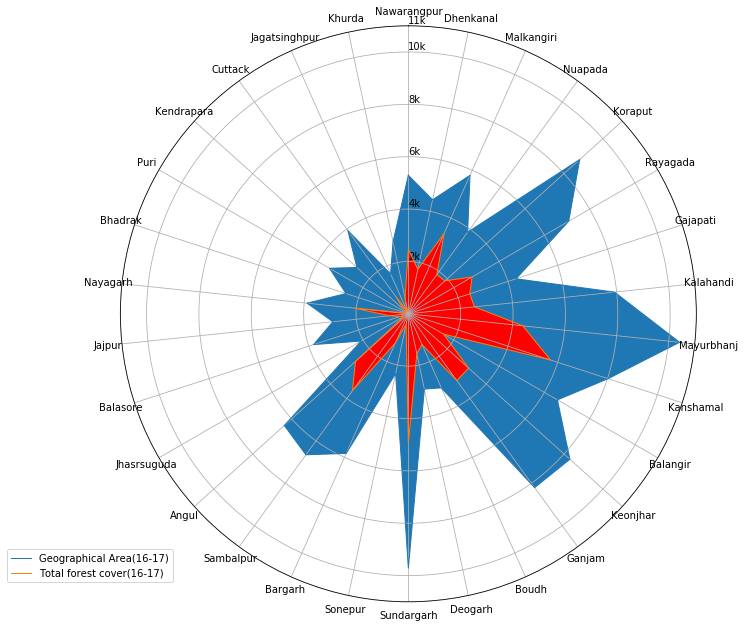

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

categories=list(stat1['Districts'])
N = len(categories)
categories

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
f = plt.figure()
ax = f.add_axes([0.05, 0.4, 2, 2], polar=True)
#ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)


ax.set_rlabel_position(0)
plt.yticks([2000,4000,6000,8000,10000,11000], ["2k","4k","6k",'8k','10k','11k'], color="black", size=10)
plt.ylim(0,11000)


values = list(stat1['Geographical Area(16-17)'])
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Geographical Area(16-17)")
ax.fill(angles, values, 'o', alpha=1)
#Geographical Area(16-17)
#Total forest cover(16-17)



values = list(stat1['Total forest cover(16-17)'])
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Total forest cover(16-17)")
ax.fill(angles, values, 'r', alpha=1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

In [49]:
stat2 = stat1.iloc[:,:3]
stat2['% Area Forest Cover'] = stat2.iloc[:,2]*100/stat2.iloc[:,1]

In [50]:
stat2 = stat2.sort_values(by = ['% Area Forest Cover'])
#stat3 = stat2.sort_values(by = ['% Area Forest Cover'])
data = [
    go.Bar(
        x=stat2['Districts'], # assign x as the dataframe column 'x'
        y=stat2['% Area Forest Cover'],
        name = 'Total Area',
#        showlegend = True,
        textposition ='outside',
        text=stat2.iloc[:,3].apply(lambda x: np.round(x,2)),
        textfont = {'size': 15}
        
    )
]

layout = go.Layout(
    barmode='overlay',
    title='Percentage of land acquired by forests in Districts of Odisha',
    yaxis=dict(
        title='Percentage of land acquired by forests'
    )
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Percentage of land acquired by forests')

In [51]:
pd.DataFrame(data={'Limit':limit,'District':district,'value':value},index = attr)

,Limit,District,value
Geographical Area(16-17),max,Mayurbhanj,10418.00
Geographical Area(16-17),min,Jagatsinghpur,1668.00
Total forest cover(16-17),max,Kanshamal,5709.83
Total forest cover(16-17),min,Bhadrak,97.07
Population,max,Ganjam,3529031.00
Population,min,Deogarh,312520.00
Population increase,max,Balangir,23.32
Population increase,min,Jagatsinghpur,7.50
Sex Ration,max,Rayagada,1051.00
Sex Ration,min,Nayagarh,915.00


## Success of SHGs in the districts of Odisha
The following graph depicts the number of functioning SHGs in each district of Odisha. It also arranges the districts in increasing order of number of active SHGs. There is a huge contrast between the districts with minimum number and the maximum number of active SHGs but in general, the number of SHGs are expectantly high in some of the districts such as Mayurbhanj and Ganjam. These districts depict a very strong characteristic of self dependent and self employed districts.

In [52]:
df8 = df8.sort_values(by=['Physical_Functioning SHGs(No.)'])

data = [
    go.Bar(
        x=df8['Districts'], # assign x as the dataframe column 'x'
        y=df8['Physical_Functioning SHGs(No.)'],
        name = 'Physical_Functioning SHGs(No.)',
        textposition ='outside',
        text=df8['Physical_Functioning SHGs(No.)'],
        marker = {'color' : 'darkslategrey'}
    )
]

layout = go.Layout(
    #barmode='overlay',
    title='Physical_Functioning SHGs(No.)',
    yaxis = dict(range = [0,20000], title = 'Number of SHGs'),
    legend=dict(orientation="h", x = .51, y = 1.1),
    #plot_bgcolor='silver',
    #paper_bgcolor = 'silver'
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='Number of SHGs')

## NRLM funds and expenditure for districts of Odisha
The following graph draws a clear contrast between the Nationl Rural Livelihood Management funds and the expenditure for each district. It can be claerly observed that most of the dictricts spent only about 50% of the total fund while some districts such as Baudh and Anugul only spent 3 to 5% of the total funds. The graph demands for a push for the authorities that would make them utilise this fund bettter to provide better livelihood and living conditions to the districts.

In [53]:
df8 = df8.sort_values(by=['NRLM Funds available(Rs. lakh)'])
data = [
    go.Bar(
        x=df8['Districts'], # assign x as the dataframe column 'x'
        y=df8['NRLM Funds available(Rs. lakh)'],
        name = 'NRLM Funds available(Rs. lakh)',
        textposition ='outside',
        text=df8['NRLM Funds available(Rs. lakh)']
    ),
    go.Scatter(
        x=df8['Districts'],
        y=df8['NRLM Financial Total Expenditure(Rs. lakh)'],
        name = 'NRLM Financial Total Expenditure(Rs. lakh)',
        textposition ='bottom center',
        text=df8['NRLM Financial Total Expenditure(Rs. lakh)'],
        textfont = {'color': 'white','size':8},
        mode = 'text+markers+lines'
        
    )

]

layout = go.Layout(
    #barmode='overlay',
    title='NRLM Funds available and Total expenditure for Districts of Odisha',
    yaxis = dict(range = [0,900], title = 'NRLM funds availability and expenditure'),
    legend=dict(orientation="h", x = .51, y = 1.1),
    plot_bgcolor='silver'
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='NRLM Funds available and Total expenditure')

In [54]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')